In [2]:
import glob
import pandas as pd
import os

# Emotion code to label mapping
emotion_map = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# Function to extract emotion code from filename
def extract_emotion(filename):
    emotion_code = filename.split("-")[2]  # third part is emotion code
    return emotion_map.get(emotion_code, "unknown")

# Paths to speech and song folders (adjust if different)
speech_path = "Audio_Speech_Actors_01-24"
song_path   = "Audio_Song_Actors_01-24"

# Get all .wav files from both folders
speech_files = glob.glob(speech_path + "/**/*.wav", recursive=True)
song_files = glob.glob(song_path + "/**/*.wav", recursive=True)

# Combine paths and extract emotion labels
all_files = speech_files + song_files
df = pd.DataFrame({
    "path": all_files,
    "labels": [extract_emotion(os.path.basename(f)) for f in all_files]
})

# Optional: Shuffle
df = df.sample(frac=1).reset_index(drop=True)

#Split original dataset BEFORE oversampling
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['labels'], random_state=42)

# Show sample
print(train_df)


                                                   path     labels
1543  Audio_Song_Actors_01-24\Actor_05\03-02-06-02-0...    fearful
1998  Audio_Speech_Actors_01-24\Actor_11\03-01-01-01...    neutral
879   Audio_Song_Actors_01-24\Actor_02\03-02-05-01-0...      angry
1430  Audio_Speech_Actors_01-24\Actor_09\03-01-01-01...    neutral
609   Audio_Speech_Actors_01-24\Actor_08\03-01-02-02...       calm
...                                                 ...        ...
2412  Audio_Speech_Actors_01-24\Actor_04\03-01-08-01...  surprised
100   Audio_Speech_Actors_01-24\Actor_23\03-01-05-01...      angry
1374  Audio_Speech_Actors_01-24\Actor_04\03-01-02-02...       calm
1106  Audio_Speech_Actors_01-24\Actor_05\03-01-01-01...    neutral
406   Audio_Speech_Actors_01-24\Actor_23\03-01-08-01...  surprised

[1961 rows x 2 columns]


C:\Users\asus\AppData\Local\Temp\ipykernel_15272\2252950132.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x="labels", order=train_df["labels"].value_counts().index, palette="viridis")


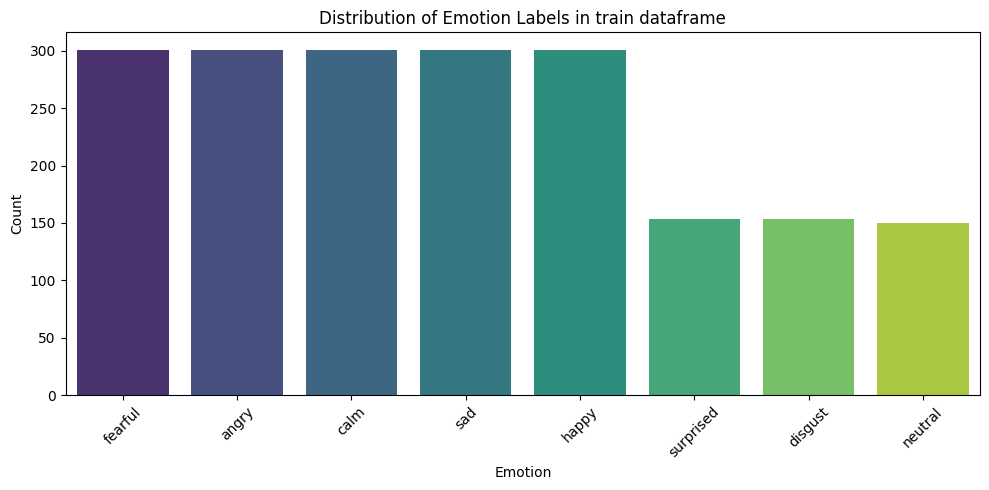

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x="labels", order=train_df["labels"].value_counts().index, palette="viridis")
plt.title("Distribution of Emotion Labels in train dataframe")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Now oversample the train data

c:\Users\asus\anaconda3\envs\tf_env\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\asus\anaconda3\envs\tf_env\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
C:\Users\asus\AppData\Local\Temp\ipykernel_15272\3335209966.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=balanced_train_df, x="labels", order=balanced_train_df["labels"].value_counts().index, palette="viridis")


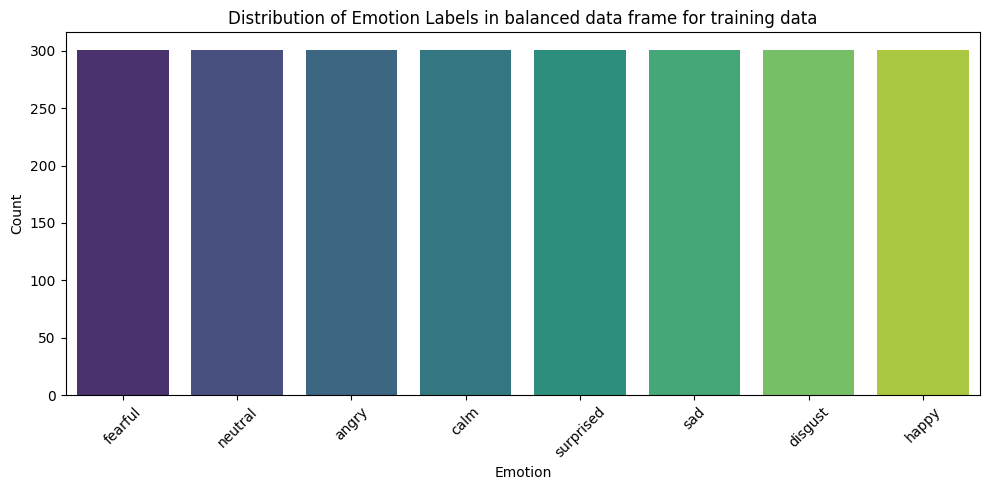

In [4]:
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert training data to format for oversampling
X_train_paths = train_df[['path']]
y_train_labels = train_df['labels']

# Perform oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_paths, y_train_labels)

# Create new balanced training DataFrame
balanced_train_df = pd.DataFrame({
    "path": X_resampled['path'],
    "labels": y_resampled
})

plt.figure(figsize=(10, 5))
sns.countplot(data=balanced_train_df, x="labels", order=balanced_train_df["labels"].value_counts().index, palette="viridis")
plt.title("Distribution of Emotion Labels in balanced data frame for training data")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
import librosa
import numpy as np
def extract_mfccs(filename):
  y, sr = librosa.load(filename, duration=3, offset=0.5)
  mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfccs

In [8]:
extract_mfccs(balanced_train_df['path'][0])

array([-4.8096277e+02,  5.9471077e+01, -5.3448005e+00,  1.1886932e+01,
        1.4518580e+00, -8.5025129e+00, -1.4035990e+01, -4.7501689e-01,
       -1.2303984e+01, -4.9113855e+00, -7.1839386e-01, -4.6878934e+00,
       -7.2018499e+00, -1.5665078e+00, -3.4328856e+00, -9.0356731e-01,
       -3.4129589e+00, -2.7278841e+00, -2.9570811e+00, -3.4539495e+00,
       -1.0660631e+01, -3.0549307e+00, -6.3844686e+00, -2.5240362e+00,
       -5.1114159e+00,  1.1442279e+00, -4.5422721e+00, -1.5327165e+00,
       -1.8856397e+00, -2.2487118e+00, -2.7054843e-01,  1.3844283e+00,
        2.4080989e+00,  3.5314124e+00,  2.4070487e+00,  2.9612014e+00,
        4.1377559e+00,  8.8413486e+00,  1.2388360e+01,  1.7361141e+01],
      dtype=float32)

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# For balanced training MFCC extraction
X_train = []
y_train = []

for _, row in balanced_train_df.iterrows():
    mfcc = extract_mfccs(row['path'])  # Ensure this returns shape (time_steps, features)
    if mfcc is not None:
        X_train.append(mfcc)
        y_train.append(row['labels'])

X_test = []
y_test = []

for _, row in test_df.iterrows():
    mfcc = extract_mfccs(row['path'])
    if mfcc is not None:
        X_test.append(mfcc)
        y_test.append(row['labels'])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)



In [10]:
print(X_train)

[[-4.8096277e+02  5.9471077e+01 -5.3448005e+00 ...  8.8413486e+00
   1.2388360e+01  1.7361141e+01]
 [-7.0002191e+02  7.1577553e+01  2.6634905e+01 ... -1.1089414e+00
  -2.7643173e+00 -6.8035465e-01]
 [-3.7900873e+02  4.0430199e+01 -4.5817593e+01 ... -2.9862280e+00
  -5.5276656e-01  1.0470123e+01]
 ...
 [-4.8491190e+02  5.2183716e+01 -3.4606233e+00 ... -1.4381136e+00
  -2.3270776e+00  2.0932224e+00]
 [-4.9577496e+02  6.1215088e+01 -2.2064347e+00 ...  6.9032779e+00
   6.3348913e+00  5.5160365e+00]
 [-5.7203387e+02  5.3070312e+01 -5.6747060e+00 ...  1.6146021e+00
   8.7924099e-01  4.3718872e+00]]


 ### CNN+GRU MODEL

In [11]:
from keras.models import Sequential
from keras.layers import Bidirectional, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from packaging import version
from keras.layers import GlobalAveragePooling1D,GRU
from keras.layers import LeakyReLU
from keras.layers import SimpleRNN


# ========== OneHot Encode Labels ==========
if version.parse(sklearn.__version__) >= version.parse("1.2"):
    onehot_encoder = OneHotEncoder(sparse_output=False)
else:
    onehot_encoder = OneHotEncoder(sparse=False)

y_train_reshaped = np.array(y_train).reshape(-1, 1)
y_test_reshaped = np.array(y_test).reshape(-1, 1)

y_train_categorical = onehot_encoder.fit_transform(y_train_reshaped)
y_test_categorical = onehot_encoder.transform(y_test_reshaped)

class_labels = onehot_encoder.categories_[0]

# ========== Reshape MFCC Features ==========
# Assuming MFCC features: shape = (samples, time_steps=40, features=13 or more)
X_train = np.array(X_train)
X_test = np.array(X_test)

if len(X_train.shape) == 3:
    pass  # already in shape (samples, time_steps, features)
else:
    X_train = X_train.reshape(-1, 40, 1)
    X_test = X_test.reshape(-1, 40, 1)

#========== Define Improved Model ==========
model = Sequential([
    Conv1D(128, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),

    Conv1D(256, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),

    Conv1D(512, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),

    Bidirectional(GRU(256, return_sequences=True)),  # <-- keep full sequence
    Bidirectional(GRU(128, return_sequences=True)),  # <-- keep full sequence
    GlobalAveragePooling1D(),  # Or add a custom Attention() layer here
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(len(class_labels), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


c:\Users\asus\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 36, 128)        │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 36, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 14, 256)        │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 7, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 3, 512)         │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 1, 512)         │     1,182,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 1, 256)         │       493,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,567,944 (9.80 MB)

 Trainable params: 2,566,152 (9.79 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.2299 - loss: 1.9554 - val_accuracy: 0.2444 - val_loss: 2.3551 - learning_rate: 0.0010
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.3990 - loss: 1.5863 - val_accuracy: 0.3035 - val_loss: 2.0052 - learning_rate: 0.0010
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.4985 - loss: 1.3873 - val_accuracy: 0.5438 - val_loss: 1.2212 - learning_rate: 0.0010
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.5509 - loss: 1.2160 - val_accuracy: 0.6191 - val_loss: 1.0565 - learning_rate: 0.0010
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.6197 - loss: 1.0970 - val_accuracy: 0.5295 - val_loss: 1.2337 - learning_rate: 0.0010
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.6414 - loss: 1.0226 - val_accuracy: 0.6680 - val_loss: 0.9611 - learning_rate: 0.0010
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.6762 - loss: 0.9175 - val_ac

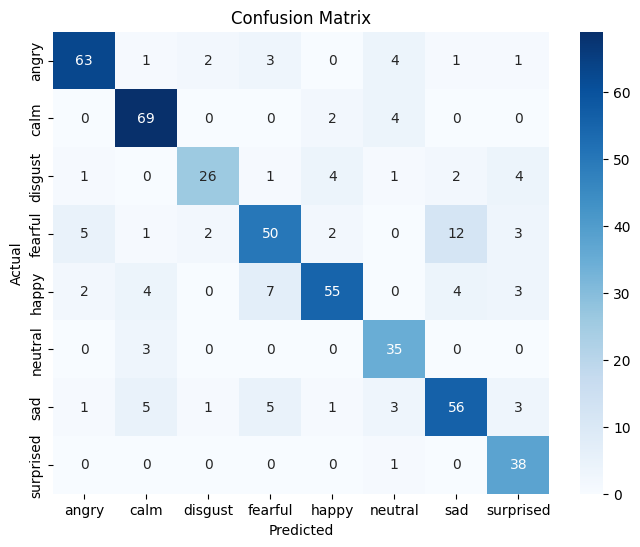

In [12]:
# ========== Callbacks ==========
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# ========== Train Model ==========
history = model.fit(
    X_train, y_train_categorical,
    validation_data=(X_test, y_test_categorical),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, reduce_lr]
)

# ========== Evaluate ==========
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

# ========== Classification Report ==========
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# ========== Confusion Matrix ==========
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
model.save("cnn+gru_model.h5")